In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import sklearn

#Linear regression

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.sample(10)

,TV,Radio,Newspaper,Sales
156,93.9,43.5,50.5,15.3
34,95.7,1.4,7.4,11.9
75,16.9,43.7,89.4,8.7
39,228.0,37.7,32.0,21.5
159,131.7,18.4,34.6,12.9
182,56.2,5.7,29.7,8.7
137,273.7,28.9,59.7,20.8
27,240.1,16.7,22.9,20.9
100,222.4,4.3,49.8,16.7
86,76.3,27.5,16.0,12.0


In [ ]:
df.corrwith(df['Sales']).sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
dtype: float64

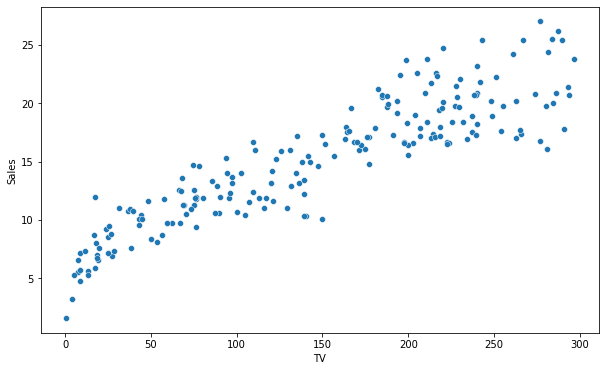

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import sklearn
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


#Multiple Linear regression

In [ ]:
df = df[df.district=='Чиланзарский']
df.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [ ]:
df.shape

(1616, 6)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.1, random_state=50)

In [ ]:
from sklearn import linear_model
MLR_model = linear_model.LinearRegression()
# x_train = np.asanyarray(train_set[['rooms','size','level','max_levels']])
x_train = np.asanyarray(train_set[['size','max_levels']])
y_train = np.asanyarray(train_set[['price']])
MLR_model.fit(x_train, y_train)
print('Coefficients: ', MLR_model.coef_)
print('theta0:', MLR_model.intercept_) 

Coefficients:  [[ 744.42003023 -402.75954181]]
theta0: [1521.04636777]


In [ ]:
# x_test = np.asanyarray(test_set[['rooms','size','level','max_levels']])
x_test = np.asanyarray(test_set[['size','max_levels']])
y_test = np.asanyarray(test_set[['price']])
y_predict = MLR_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))

In [ ]:
MAE

8333.505335071271

In [ ]:
RMSE

14456.77940405462

#Polynomial

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
   
df = pd.read_csv(url)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


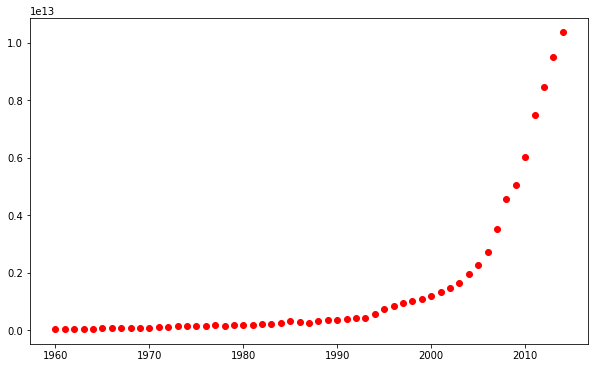

In [ ]:
plt.figure(figsize=(10,6))
x_data, y_data  = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data,'ro')
plt.show()

In [ ]:
x = np.asanyarray(df[['Year']]/df[['Year']].max())
y = np.asanyarray(df[['Value']]/df[['Value']].max())

In [ ]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(x,y)

LinearRegression()

In [ ]:
y_predict = LR_model.predict(x)

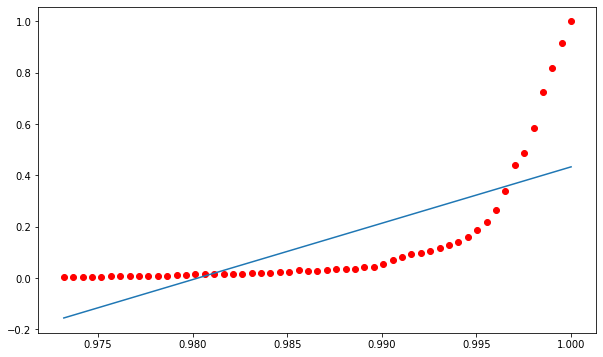

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x,y ,'ro' , label='data')
plt.plot(x,y_predict, label='fit')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y, y_predict)

In [ ]:
MAE

0.12657979406214762

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_fetures = PolynomialFeatures(degree=5, include_bias=False)
x_poly = poly_fetures.fit_transform(x)

In [ ]:
LR_model.fit(x_poly,y)

LinearRegression()

In [ ]:
y_predict = LR_model.predict(x_poly)

In [ ]:
x_poly[0]

array([0.97318769, 0.94709427, 0.92170048, 0.89698756, 0.87293725,
       0.84953178, 0.82675387, 0.80458668, 0.78301385, 0.76201944])

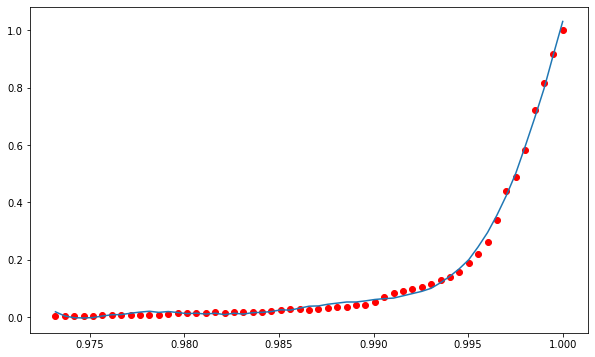

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x,y ,'ro' , label='data')
plt.plot(x,y_predict, label='fit')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y, y_predict)
print(MAE)

0.009966259261726566
